In [1]:
# Exploratory Data Analysis
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib as Path

In [77]:
# Load the ratings-sales data
df_sales=pd.read_csv("video_rating.csv")
df_sales.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [78]:
# data dimension 
df_sales.shape

(5331, 15)

In [5]:
#Different data types
df_sales.dtypes

Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [8]:
df_sales.head(10)

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN
1,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,NaN,NaN,NaN,NaN,NaN,NaN
2,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,NaN,NaN,NaN,NaN,NaN,NaN
3,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN
4,X360,2008,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T
5,PS3,2008,Action,Activision,0.43,0.51,0.02,0.19,1.14,65.0,42.0,6.6,47.0,Treyarch,T
6,Wii,2008,Action,Activision,0.29,0.28,0.01,0.07,0.65,54.0,11.0,7.5,26.0,Treyarch,T
7,PS2,2008,Action,Activision,0.17,0.00,0.00,0.26,0.43,NaN,NaN,NaN,NaN,NaN,NaN
8,DS,2008,Action,Activision,0.11,0.01,0.00,0.01,0.13,65.0,10.0,tbd,NaN,Vicarious Visions,T
9,PC,2008,Action,Activision,0.01,0.01,0.00,0.00,0.03,70.0,18.0,6.3,55.0,Treyarch,T


In [6]:
#missing values 
df_sales.isnull().sum()

Platform              0
Year_of_Release       0
Genre                 0
Publisher            25
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       2088
Critic_Count       2088
User_Score         1547
User_Count         2417
Developer          1534
Rating             1547
dtype: int64

In [79]:
# relevant continuous variables
df_sales_cont=df_sales.drop(columns=['Platform','Year_of_Release','Genre','Publisher','User_Score','Developer','Rating'])

In [80]:
# statistical summary for continuous variables
from pandas import set_option
set_option('display.width',120)
set_option('precision',3)
df_sales_cont.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,5331.000,5331.000,5331.000,5331.000,5331.000,3243.000,3243.000,2914.000
mean,0.260,0.130,0.054,0.056,0.501,67.430,26.665,87.564
std,0.847,0.614,0.271,0.271,1.780,13.743,17.399,377.707
min,0.000,0.000,0.000,0.000,0.010,19.000,4.000,4.000
25%,0.020,0.000,0.000,0.000,0.060,59.000,12.000,9.000
50%,0.090,0.010,0.000,0.010,0.160,69.000,24.000,18.000
75%,0.260,0.070,0.020,0.030,0.450,78.000,37.000,44.000
max,41.360,28.960,6.500,10.570,82.530,98.000,95.000,9851.000


In [16]:
# Platform distribution 
cat_platform=df_sales.groupby('Platform').size()
print(cat_platform)

Platform
DC         2
DS      1210
GBA      355
GC       224
PC       257
PS2     1183
PS3      255
PSP      532
Wii      511
X360     380
XB       422
dtype: int64


In [17]:
# Genre distribution 
cat_genre=df_sales.groupby('Genre').size()
print(cat_genre)

Genre
Action          932
Adventure       400
Fighting        243
Misc            671
Platform        307
Puzzle          231
Racing          388
Role-Playing    456
Shooter         421
Simulation      331
Sports          731
Strategy        220
dtype: int64


In [20]:
# Publisher distribution 
cat_publisher=df_sales.groupby('Publisher').size()
print(cat_publisher)

Publisher
10TACLE Studios            3
2D Boy                     1
505 Games                 85
5pb                        5
AQ Interactive             2
                          ..
Zoo Digital Publishing    78
Zoo Games                  8
Zushi Games                5
fonfun                     1
responDESIGN               2
Length: 253, dtype: int64


In [24]:
# Developers distribution 
cat_dev=df_sales.groupby('Developer').size()
print(cat_dev)

Developer
10tacle Studios, Fusionsphere Systems    2
1C, Various, 1C Company                  1
1C: Maddox Games                         1
1st Playable Productions                 6
2015                                     1
                                        ..
odenis studio                            1
oeFun                                    1
puzzle.tv                                1
syn Sophia                               1
zSlide                                   1
Length: 925, dtype: int64


In [28]:
# Ratings distribution 
cat_rating=df_sales.groupby('Rating').size()
print(cat_rating)

Rating
AO         1
E       1569
E10+     592
EC         2
M        495
T       1125
dtype: int64


In [72]:
# average sales by platforms
cat_avg_platform=df_sales.groupby(['Platform']).mean()['Global_Sales']
print(cat_avg_platform)

Platform
DC      0.030
DS      0.463
GBA     0.340
GC      0.305
PC      0.154
PS2     0.512
PS3     0.834
PSP     0.353
Wii     0.903
X360    0.765
XB      0.298
Name: Global_Sales, dtype: float64


In [73]:
# average sales by Genre
cat_avg_genre=df_sales.groupby(['Genre']).mean()['Global_Sales']
print(cat_avg_genre)

Genre
Action          0.502
Adventure       0.193
Fighting        0.459
Misc            0.502
Platform        0.620
Puzzle          0.340
Racing          0.636
Role-Playing    0.531
Shooter         0.610
Simulation      0.531
Sports          0.618
Strategy        0.170
Name: Global_Sales, dtype: float64


In [76]:
# average sales by Genre
cat_avg_pub=df_sales.groupby(['Publisher']).mean()['Global_Sales']
print(cat_avg_pub)

2.5534061135371178


In [29]:
# convert year to date
df_sales['Year_of_Release']=df_sales['Year_of_Release'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y'))

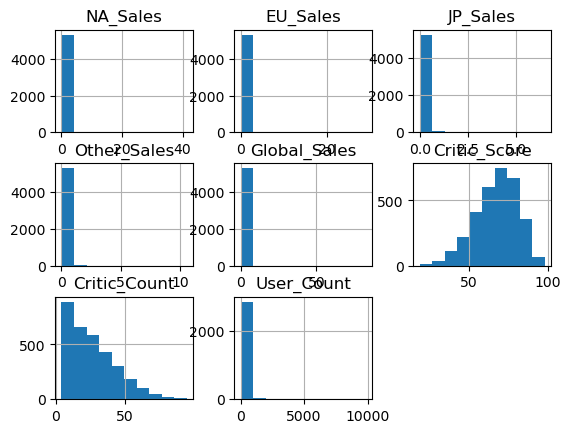

In [46]:
# A histogram of the Global sales and other sales
%matplotlib inline
import matplotlib.pyplot as plt
df_sales_cont.hist()
plt.show()

In [81]:
# transform Global scale on the natural log 
import numpy as np
df_sales['Log_Global']=np.log(df_sales['Global_Sales'])
df_sales.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Log_Global
0,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN,-1.772
1,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,NaN,NaN,NaN,NaN,NaN,NaN,-1.470
2,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,NaN,NaN,NaN,NaN,NaN,NaN,-1.833
3,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN,-1.772
4,X360,2008,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T,0.392


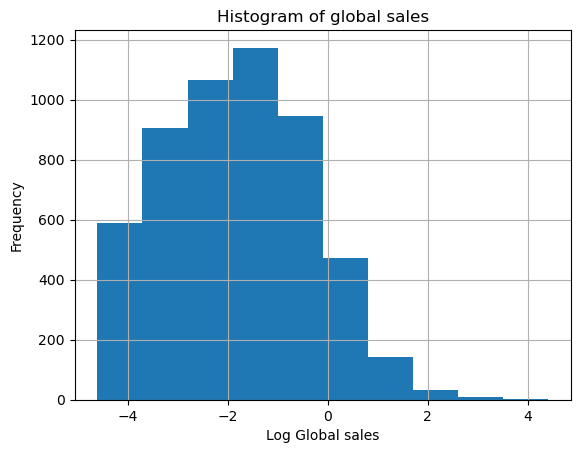

In [90]:
# A histogram of log Global sales
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
df_sales.Log_Global.hist()
pl.title("Histogram of global sales")
pl.xlabel("Log Global sales")
pl.ylabel("Frequency")
plt.show()


Log_Global         AxesSubplot(0.125,0.11;0.227941x0.77)
Critic_Score    AxesSubplot(0.398529,0.11;0.227941x0.77)
Critic_Count    AxesSubplot(0.672059,0.11;0.227941x0.77)
dtype: object

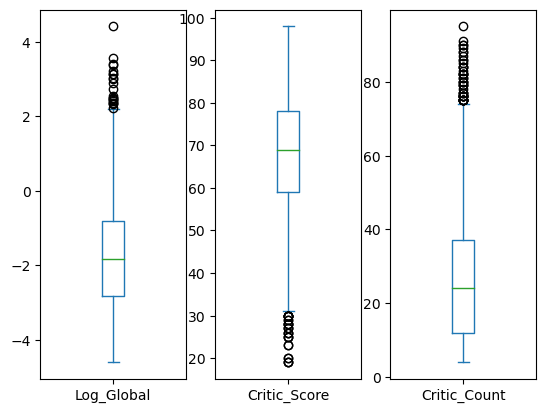

In [86]:
import matplotlib.pyplot as plt
df_sales_conts=df_sales[['Log_Global', 'Critic_Score', 'Critic_Count']]
df_sales_conts.plot(kind='box',subplots=True,layout=(1,3),sharex=False, sharey=False)

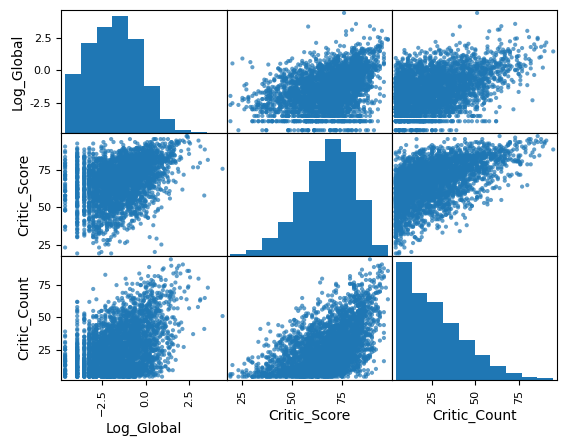

In [101]:
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
df_sales_conts=df_sales[['Log_Global', 'Critic_Score', 'Critic_Count']]
scatter_matrix(df_sales_conts,alpha=0.7)
pyplot.show()

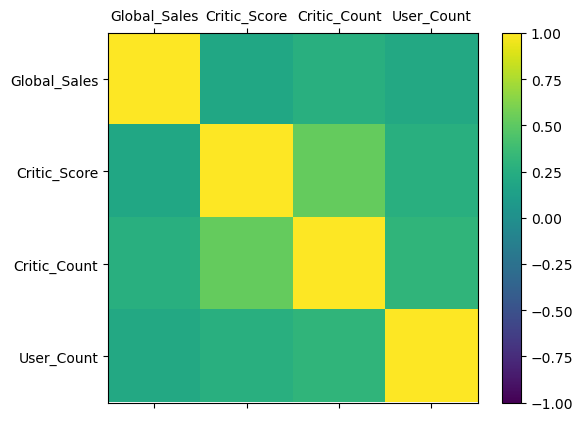

In [66]:
# correlation matrix
import numpy
names=['Global_Sales', 'Critic_Score', 'Critic_Count','User_Count']
df_sales_conts=df_sales[['Global_Sales', 'Critic_Score', 'Critic_Count','User_Count']]
correlations=sales_conts.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=numpy.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [91]:
# plot the dummy
df_sales_year=df_sales.groupby('Year_of_Release').mean()['Global_Sales']
df_sales_year

Year_of_Release
2004    0.550
2005    0.488
2006    0.515
2007    0.506
2008    0.471
Name: Global_Sales, dtype: float64

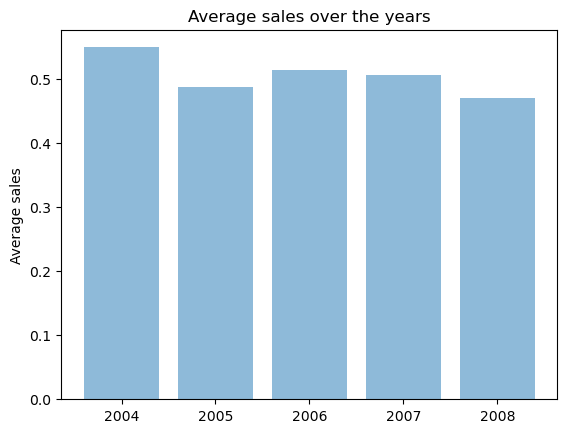

In [97]:
# Barplot of average sales over the year of release
import matplotlib.pyplot as plt; plt.rcdefaults()
objects=('2004','2005','2006','2007','2008')
avg_sales=[0.550,0.488,0.515,0.506,0.471]
y_pos=np.arange(len(objects))
plt.bar(y_pos,avg_sales,align='center',alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel("Average sales")
plt.title("Average sales over the years")
plt.show()